In [0]:
import numpy as np
import scipy # lib to train the model  
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # Made optimization of Mean Square Error

In [0]:
# variables independents
ages = [18, 25, 57, 45, 26, 64, 37, 40, 24, 33]
salaryByYear = [15000, 29000, 68000, 52000, 32000, 80000, 41000, 45000, 26000, 33000]

# transform in array
xData = np.array(ages)
yData = np.array(salaryByYear)

In [0]:
# optime function
def equationLinear(x, a, b):
  return a * x + b

In [0]:
# initial parameters 
parametersInitials = np.array([1.0, 1.0])

In [0]:
# reakuze the optimize through the MSE
parametersOptimizes, pcov = curve_fit(equationLinear, xData, yData)
# pcov -> variation of parameters  found

In [0]:
parametersOptimizes

array([ 1320.53256667, -6627.65171673])

In [0]:
# prevision of data
previsionModel = equationLinear(xData, *parametersInitials)
previsionModel

array([19., 26., 58., 46., 27., 65., 38., 41., 25., 34.])

In [0]:
absoluteError = previsionModel - yData
absoluteError

array([-14981., -28974., -67942., -51954., -31973., -79935., -40962.,
       -44959., -25975., -32966.])

In [0]:
# calculation of error squared between the measures
SE = np.square(absoluteError)
# calculate the MSE
MSE = np.mean(SE)
print('SE: ',SE)
print('\nMSE: ',MSE)

SE:  [2.24430361e+08 8.39492676e+08 4.61611536e+09 2.69921812e+09
 1.02227273e+09 6.38960422e+09 1.67788544e+09 2.02131168e+09
 6.74700625e+08 1.08675716e+09]

MSE:  2125178837.7


In [0]:
# determination coeficient 
# np.var -> calculate variance
RsSquared = 1.0 - (np.var(absoluteError) / np.var(yData))
print('Coeficient of determination: ', RsSquared)

Coeficient of determination:  0.0014906973828157088


In [0]:
# line equation
print('Y = {}*X {}'.format(parametersOptimizes[0], parametersOptimizes[1]))

Y = 1320.5325666669085*X -6627.651716729711


Text(0, 0.5, 'Annual Salary (R$)')

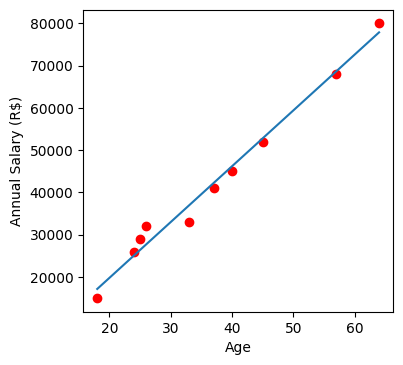

In [0]:
# plot of figure
f = plt.figure(figsize=(4, 4), dpi=100)
axes = f.add_subplot(111) # create object to subplot

axes.plot(xData, yData, 'ro')

xModel = np.linspace(min(xData), max(xData))
yModel = equationLinear(xModel, *parametersOptimizes)


axes.plot(xModel, yModel)
plt.xlabel("Age")
plt.ylabel("Annual Salary (R$)")

## The code using sklearn

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
regression = LinearRegression()
x_model_sklearn = xData.reshape(-1, 1) # make a redimention because the sklearn get 2D array
regression_train = regression.fit(x_model_sklearn, yData)

In [0]:
prevision = regression_train.predict(x_model_sklearn)

In [0]:
MSE = mean_squared_error(yData, prevision)
print('MSE: ', MSE)

MSE:  5479238.909036706


In [0]:
# find parameters
print('Y = {}*X {}'.format(regression_train.coef_, regression_train.intercept_))

from sklearn.metrics import r2_score

R_2 = r2_score(yData, prevision)
print("Determination Coeficient R2:", R_2)

Y = [1320.53256496]*X -6627.651646877624
Determination Coeficient R2: 0.9846300347582353


# Regression for a real database

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# if in google colab, execute the cell above and the line bellow
data = pd.read_csv("drive/My Drive/Colab Notebooks/headbrain.csv")
# if in jupyter notebook execute only the line bellow
# data = pd.read_csv("headbrain.csv")

data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [0]:
x= data["Head Size(cm^3)"].values
y= data["Brain Weight(grams)"].values

In [0]:
y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [0]:
# regressor
reg = LinearRegression()
x_reshaped = x.reshape((-1, 1))
regression = reg.fit(x_reshaped, y)

In [0]:
prevision=reg.predict(x_reshaped)

In [0]:
# find parameters
print('Y = {}*X {}'.format(regression.coef_, regression.intercept_))

R_2 = r2_score(y, prevision)

print("Determination Coeficient R2:", R_2)

Y = [0.26342934]*X 325.5734210494426
Determination Coeficient R2: 0.639311719957


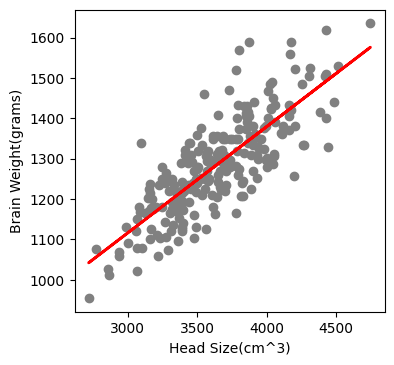

In [0]:
plt.figure(figsize=(4,4), dpi=100)
plt.scatter(x, y, color="gray")
plt.plot(x, prevision, color="red", linewidth=2)
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()